In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 20,
          'figure.figsize': (12, 6),
          'axes.labelsize': 20,
          'axes.titlesize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'lines.linewidth': 3,
          'legend.frameon': False}
plt.rcParams.update(params)

# Set up a problem

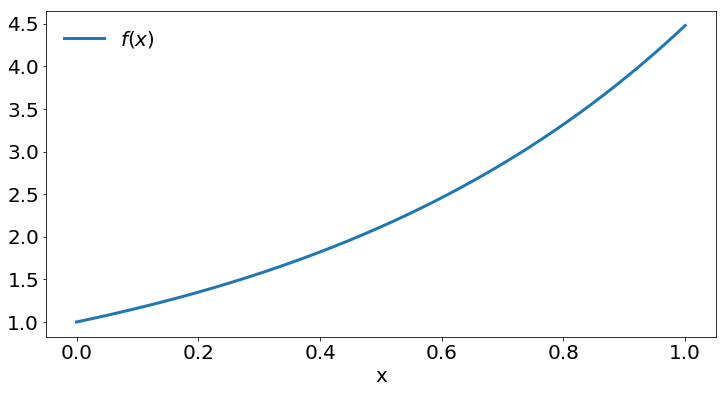

In [2]:
def f(x):
    return np.exp(1.5*x)

x_01 = np.linspace(0, 1, 1000)
plt.plot(x_01, f(x_01), label='$f(x)$')
plt.xlabel('x')
plt.legend()

# Make a function to return the interpolant

In [3]:
def make_interpolant(x0, h, degree, f):
    # create some notes
    nodes = x0 + np.linspace(-h/2, h/2, degree+1)
    
    # make the Vandermonde matrix
    V = np.array([
    nodes**i
    for i in range(degree+1)
]).T
    
    # solve for the coefficients
    coeffs = la.solve(V, f(nodes))
    
    return coeffs

# Set up a test

In this test we're going to select an $h$ and select a polynomial interpolant degree.

Notice what happens when you reduce $h$ or increase p!

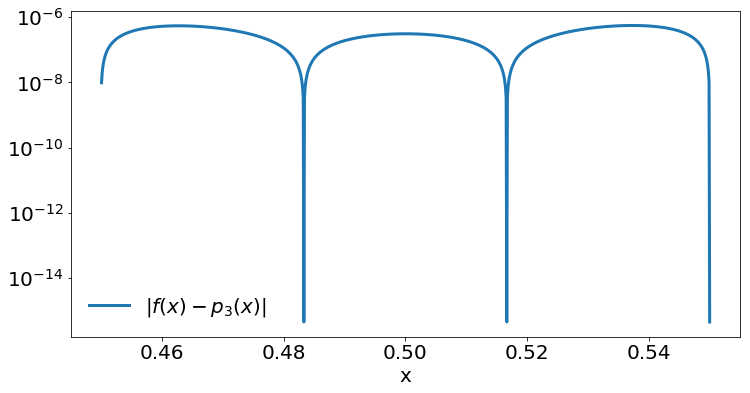

In [4]:
h = 0.1
degree = 3
x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

c = make_interpolant(0.5, h, degree, f)

# make the interpolant (as a function)
def p(x):
    interp = 0*x
    for i in range(degree+1):
        interp += c[i] * x**i
    return interp
            
plt.semilogy(x_0h, np.abs(f(x_0h) - p(x_0h)), label='$|f(x) - p_%s(x)|$'%degree)
plt.xlabel('x')
plt.legend()

# Test Error Convergence in $h$

Does the error behave like
$$
e \sim h^{\alpha}
$$
for some $\alpha$?

Experiment details:

* Fix a degree

* Create a list of $h$ values

* Measure the error (maximum) for each $h$ value

* Look at the slope of errors versus $h$ in log-log

In [5]:
hlist = 1 / 2**(np.arange(0,12))

In [6]:
hlist

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         1.25000000e-01,   6.25000000e-02,   3.12500000e-02,
         1.56250000e-02,   7.81250000e-03,   3.90625000e-03,
         1.95312500e-03,   9.76562500e-04,   4.88281250e-04])

In [7]:
errors = []

degree = 3

for h in hlist:
    x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

    c = make_interpolant(0.5, h, degree, f)
    
    # make the interpolant (as a function)
    def p(x):
        interp = 0*x
        for i in range(degree+1):
            interp += c[i] * x**i
        return interp
    
    e = np.abs(f(x_0h) - p(x_0h)).max()
    errors.append(e)
    
errors = np.array(errors)

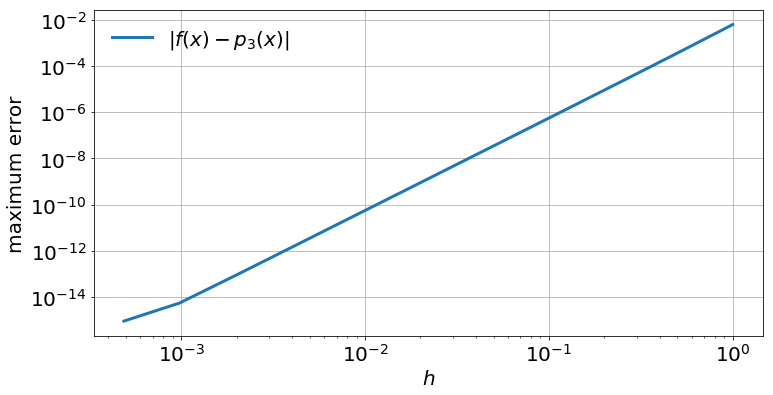

In [8]:
plt.loglog(hlist, errors, label='$|f(x) - p_%s(x)|$'%degree)
plt.grid(True)
plt.xlabel('$h$')
plt.ylabel('maximum error')
plt.legend()

In [9]:
alpha = np.log(errors[1:]/errors[:-1]) / np.log(hlist[1:]/hlist[:-1])
print(alpha)

[ 4.10762798  4.04713982  4.02187275  4.01050782  4.00514886  4.0025456
  4.00126956  3.99996883  3.99055597  3.92283214  2.5849625 ]


# Test Error Convergence in degree $p$

Does the error behave like
$$
e \sim p^{-\alpha}
$$
for some $\alpha$?  (...no)

Experiment details:

* Fix an $h$

* Create a list of $p$ values

* Measure the error (maximum) for each $p$ value

* Look at the slope of errors versus $p$ in log-log

In [10]:
plist = np.arange(1,8)

In [11]:
errors = []

h = 1

for degree in plist:
    x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

    c = make_interpolant(0.5, h, degree, f)
    
    # make the interpolant (as a function)
    def p(x):
        interp = 0*x
        for i in range(degree+1):
            interp += c[i] * x**i
        return interp
    
    e = np.abs(f(x_0h) - p(x_0h)).max()
    errors.append(e)
    
errors = np.array(errors)

Text(0,0.5,'maximum error')

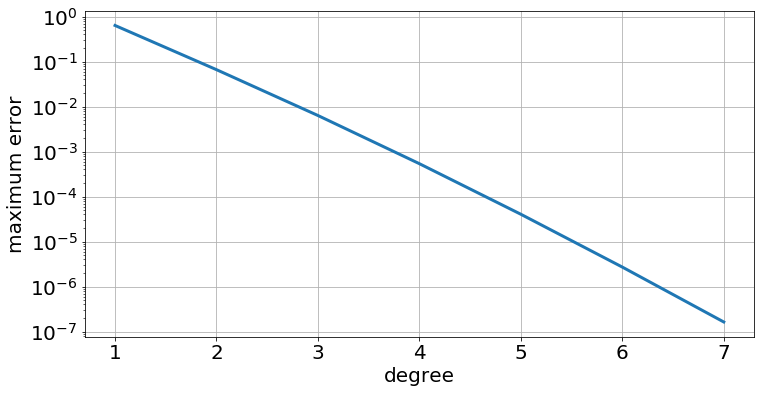

In [12]:
plt.semilogy(plist, errors)
plt.grid(True)
plt.xlabel('degree')
plt.ylabel('maximum error')

In [13]:
alpha = np.log(errors[1:]/errors[:-1]) / np.log(plist[1:]/plist[:-1])
print(alpha)

[ -3.26310927  -5.78432042  -8.56851199 -11.59347395 -14.82100321
 -18.2211681 ]
